# Read Dataset

In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/saurabh firke/Downloads/AirPassengers.csv")

# Filter Warnings

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Convert Date

In [4]:
A.Month = pd.to_datetime(A.Month)

# Make Month as index and drop it as a column

In [5]:
A

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [6]:
A.index=A.Month
A=A.drop(labels=["Month"],axis=1)
A.columns=["passangers"]

# Plot and Decompose

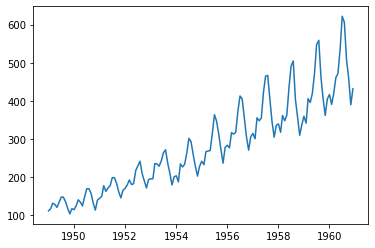

In [7]:
import matplotlib.pyplot as plt
plt.plot(A)

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(A,model='multiplicative')

<AxesSubplot:xlabel='Month'>

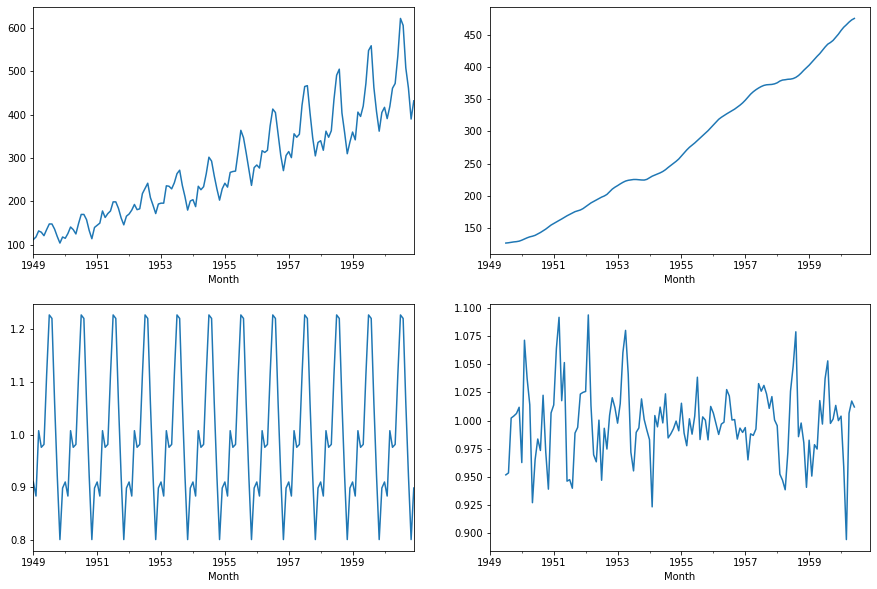

In [9]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
Q.observed.plot()

plt.subplot(2,2,2)
Q.trend.plot()

plt.subplot(2,2,3)
Q.seasonal.plot()

plt.subplot(2,2,4)
Q.resid.plot()

# Rolling mean and Rolling Stdev

In [10]:
RM_Original = A.rolling(window=12).mean()
RST_Original = A.rolling(window=12).std()

Text(0.5, 1.0, 'Non Stationary')

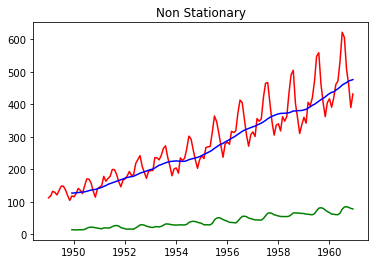

In [11]:
plt.plot(A,c="red")
plt.plot(RM_Original,c="blue")
plt.plot(RST_Original,c="green")
plt.title("Non Stationary")

# Conversion attempt 1
   Convert TS --> Log

Text(0.5, 1.0, 'Non Stationary')

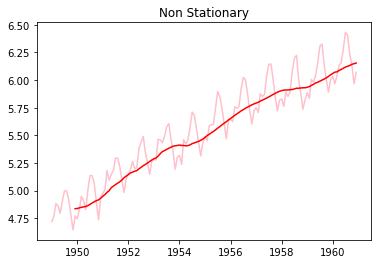

In [12]:
import numpy as np

log_A = np.log(A)
RM_LOG_A = log_A.rolling(window=12).mean()
RST_LOG_A = log_A.rolling(window=12).std()

plt.plot(log_A,c="pink")
plt.plot(RM_LOG_A,c="red")
#plt.plot(RST_LOG_A,c="brown")
plt.title("Non Stationary")

# Conversion attempt 2:
log_A - RM_logA

In [13]:
log_A = np.log(A)
RM_LOG_A = log_A.rolling(window=12).mean()

In [14]:
TS1 = log_A - RM_LOG_A

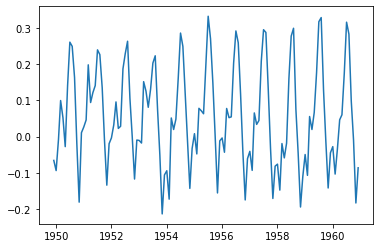

In [15]:
plt.plot(TS1)

# Divide data in training and testing set

In [16]:
TS1_upd = TS1[TS1.passangers.isna()==False]

In [17]:
TS1_upd.shape

(133, 1)

In [18]:
trd = TS1_upd[0:106]
tsd = TS1_upd[106:]

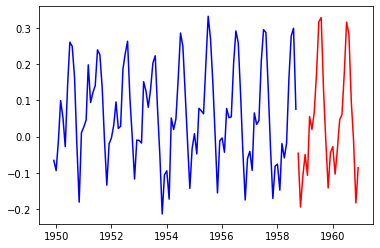

In [19]:
plt.plot(trd,c="blue")
plt.plot(tsd,c="red")

# Forecast

In [20]:
trd

,passangers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1958-05-01,-0.018162
1958-06-01,0.160253
1958-07-01,0.276817


In [21]:
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()

C:\Users\shibashish nayak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [22]:
pred = model.predict(start="1958-10-01", end="1960-12-01")

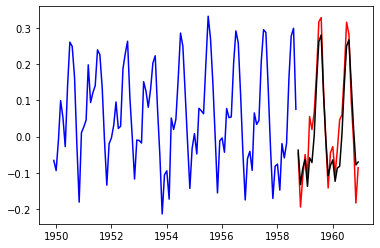

In [23]:
plt.plot(trd,c="blue")
plt.plot(tsd,c="red")
plt.plot(pred,c="black")

# Convert values into its original form

In [24]:
R = RM_LOG_A[RM_LOG_A.passangers.isna()==False]

In [25]:
tsd.shape

(27, 1)

In [26]:
pred = pd.DataFrame(np.exp(pred + RM_LOG_A.tail(27).passangers),columns=A.columns)

In [27]:
pred

,passangers
1958-10-01,362.074874
1958-11-01,329.665472
1958-12-01,345.022132
1959-01-01,355.254891
1959-02-01,331.825018
1959-03-01,362.397462
1959-04-01,361.557750
1959-05-01,394.308061
1959-06-01,459.595119
1959-07-01,518.826980
